In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


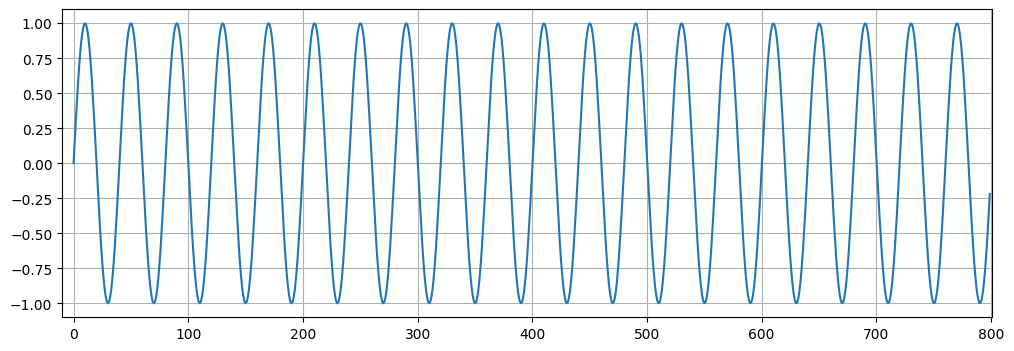

In [2]:
x=torch.linspace(0,799,800)
y=torch.sin(x*2*3.14/40)
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.plot(y.numpy())
plt.grid(True)

In [3]:
test_size=40
train_set=y[:-test_size]
test_set=y[-test_size:]


In [4]:
def input_data(seq,ws):
    out=[]
    L=len(seq)
    for i in range(L-ws):
        window=seq[i:i+ws]
        label=seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [5]:
window_size=40
train_data= input_data(train_set,window_size)

In [6]:
class LSTM(nn.Module):
    def __init__(self,input_size=1,hidden_size=50,out_size=1):
        super().__init__()
        self.hidden_size=hidden_size
        self.lstm=nn.LSTM(input_size,hidden_size)
        self.linear=nn.Linear(hidden_size,out_size)
        self.hidden=(torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out,self.hidden=self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred=self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [7]:
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [8]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


Epoch:  1 Loss: 0.07270970
Loss on test predictions: 0.6214457750320435


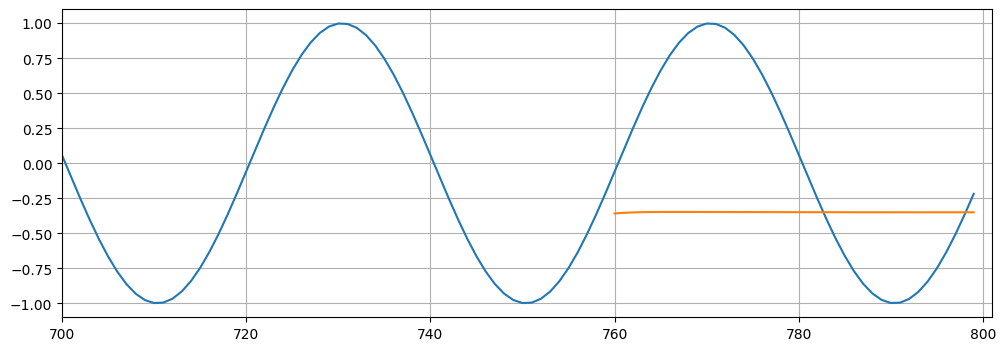

Epoch:  2 Loss: 0.03937380
Loss on test predictions: 0.5338211059570312


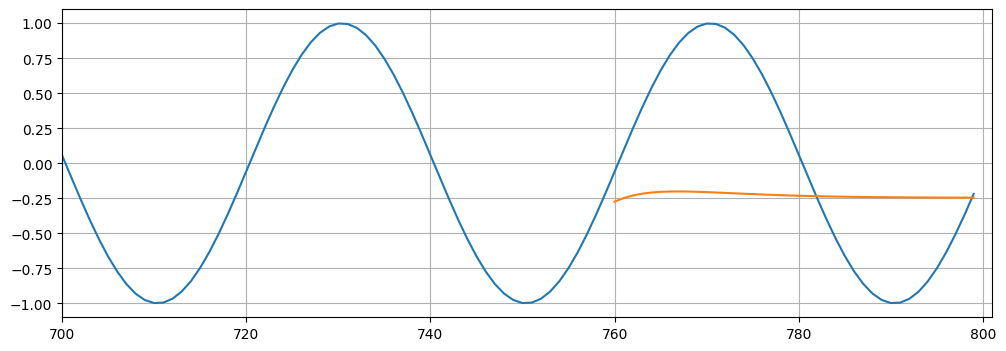

Epoch:  3 Loss: 0.00741273
Loss on test predictions: 0.2765262722969055


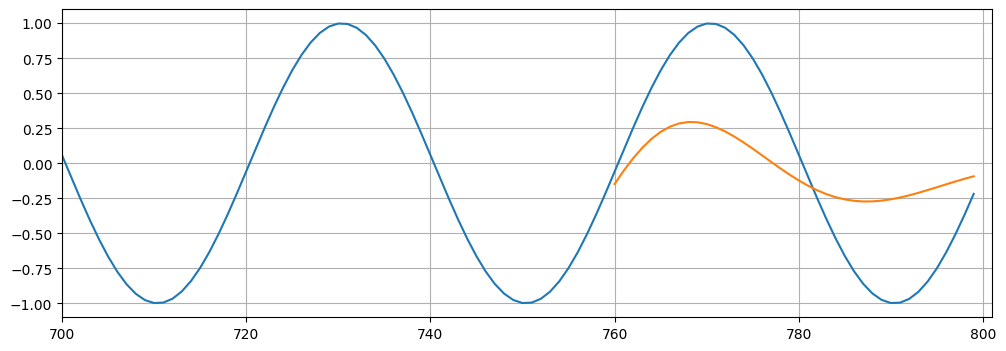

Epoch:  4 Loss: 0.00053089
Loss on test predictions: 0.012663508765399456


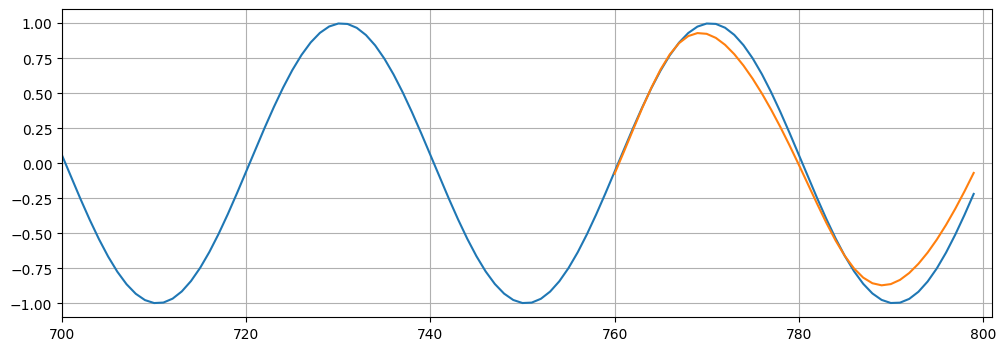

Epoch:  5 Loss: 0.00025469
Loss on test predictions: 0.0023197063710540533


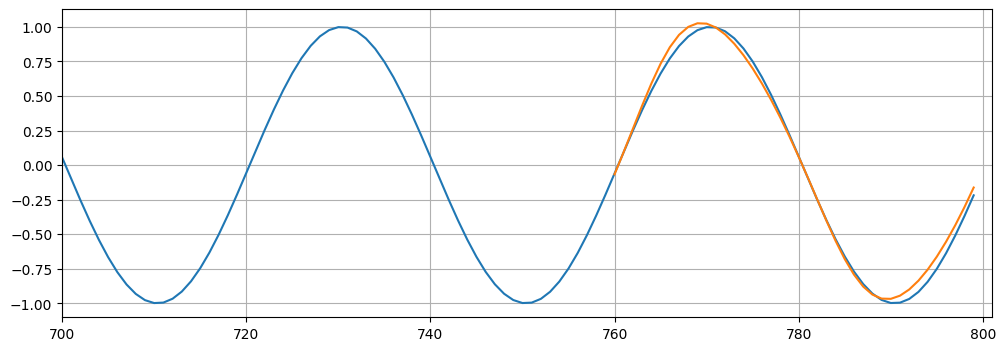

Epoch:  6 Loss: 0.00024363
Loss on test predictions: 0.0020017088390886784


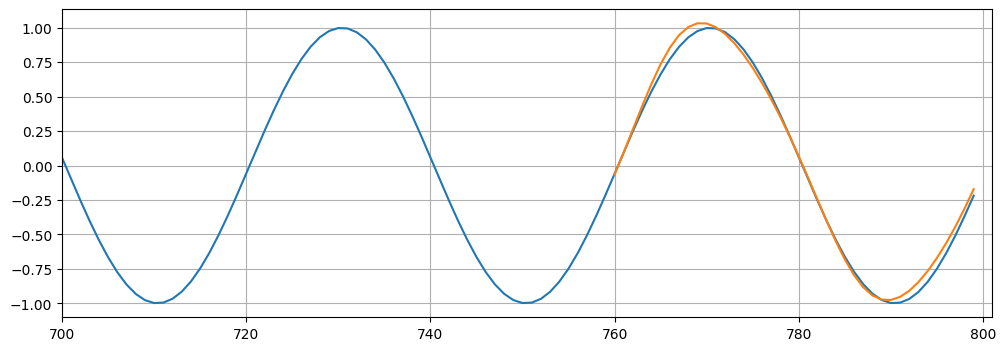

Epoch:  7 Loss: 0.00024353
Loss on test predictions: 0.0018929671496152878


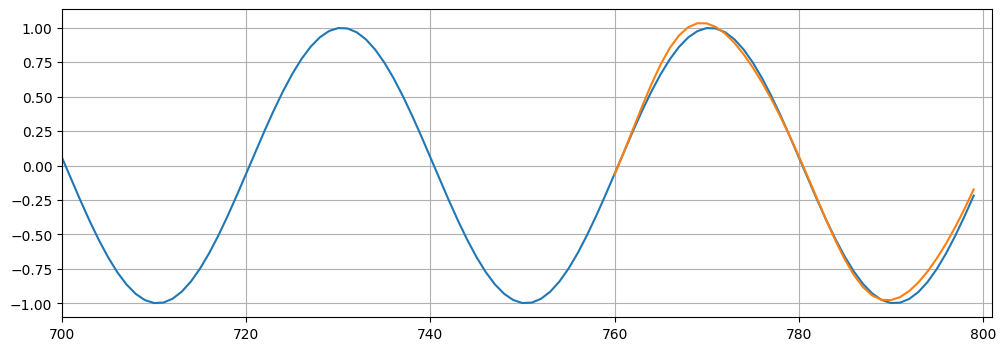

Epoch:  8 Loss: 0.00024181
Loss on test predictions: 0.0018058220157399774


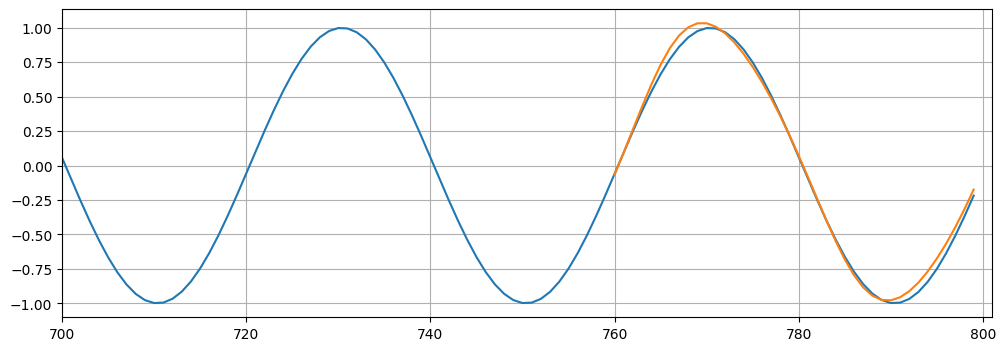

Epoch:  9 Loss: 0.00023833
Loss on test predictions: 0.001729198032990098


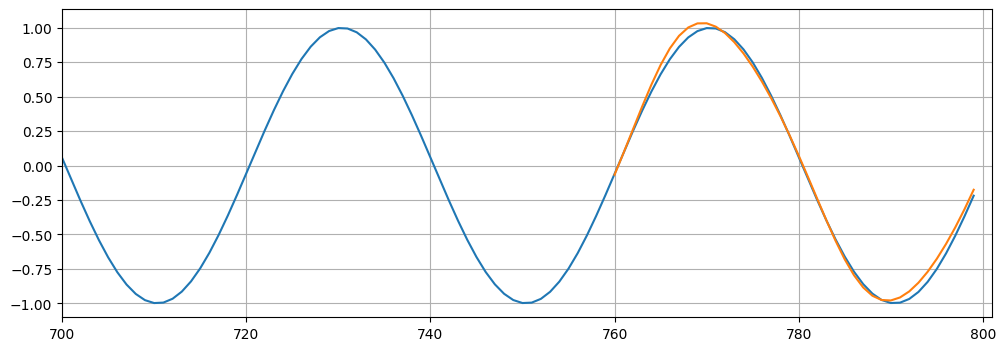

Epoch: 10 Loss: 0.00023356
Loss on test predictions: 0.0016607632860541344


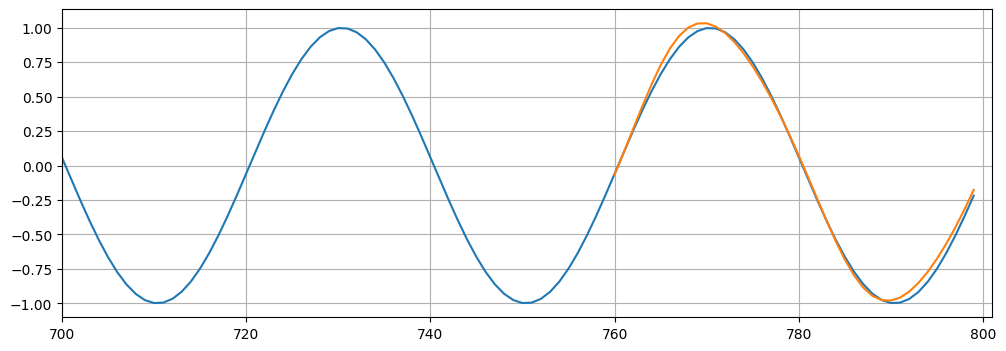

In [9]:
epochs = 10
future = 40

for i in range(epochs):
    

    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
  
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

  
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [10]:
epochs = 10
window_size = 40
future = 40


all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [11]:
import time
start_time = time.time()

for i in range(epochs):
    
    
    for seq, y_train in all_data:  
       
       
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
 
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00023259
Epoch:  2 Loss: 0.00022590
Epoch:  3 Loss: 0.00021888
Epoch:  4 Loss: 0.00021174
Epoch:  5 Loss: 0.00020461
Epoch:  6 Loss: 0.00019759
Epoch:  7 Loss: 0.00019076
Epoch:  8 Loss: 0.00018415
Epoch:  9 Loss: 0.00017780
Epoch: 10 Loss: 0.00017171

Duration: 8 seconds


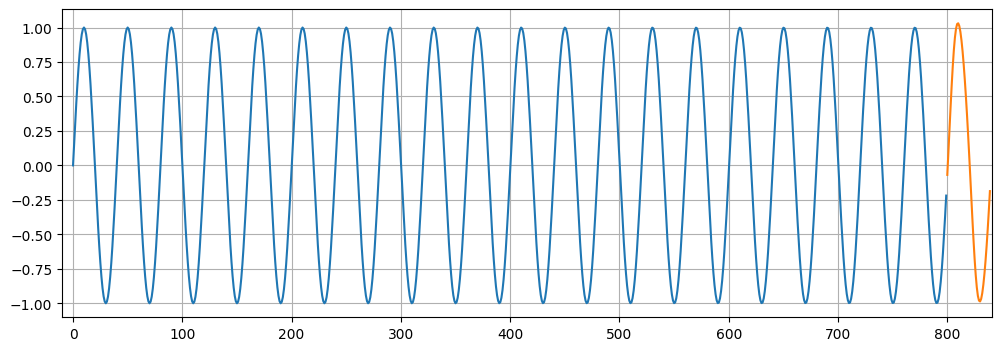

In [12]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()